# 基于决策树的鸢尾花分类预测实验
本实验将演示如何使用决策树模型对鸢尾花数据集进行分类预测，包括数据读取、分析、预处理、建模、评估及结论。

## 1. 读取数据
数据集文件名为 `iris.csv`，位于当前目录。

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,sepal_l,sepal_w,petal_l,petal_w,classes
0,0,5.1,3.5,1.4,0.2,0.0
1,1,4.9,3.0,1.4,0.2,0.0
2,2,4.7,3.2,1.3,0.2,0.0
3,3,4.6,3.1,1.5,0.2,0.0
4,4,5.0,3.6,1.4,0.2,0.0


## 2. 描述性分析与可视化分析

In [3]:
# 查看数据的统计描述
df.describe()

,Unnamed: 0,sepal_l,sepal_w,petal_l,petal_w,classes
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


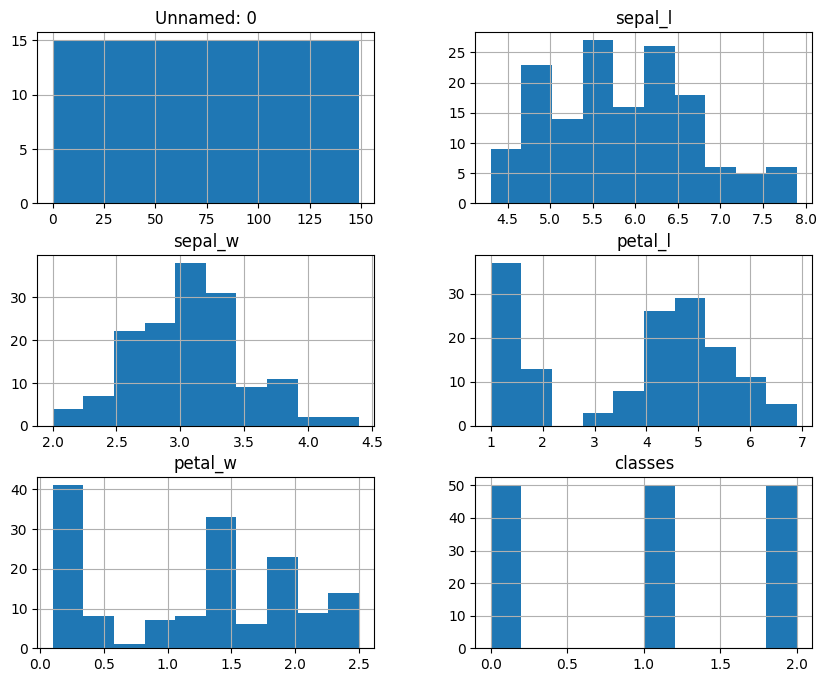

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))
plt.show()

## 3. 数据预处理

In [5]:
# 划分自变量和因变量
X = df.loc[:,df.columns!='classes']
y = df.loc[:,df.columns=='classes']
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y)
X_tr.shape,X_ts.shape

((112, 5), (38, 5))

## 4. 建立决策树模型

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_tr,y_tr)

## 5. 模型预测与评估

In [7]:
# 对测试集预测
y_pred = dtc.predict(X_ts)
y_pred

array([2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 0., 0., 2., 1., 0., 1., 2.,
       2., 2., 2., 0., 0., 0., 1., 2., 0., 2., 0., 1., 1., 1., 2., 0., 2.,
       2., 1., 0., 2.])

In [8]:
# 查看决策树模型混淆矩阵
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_ts,y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 16]])

In [9]:
# 打印决策树模型混淆矩阵评分
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [10]:
# 使用5折交叉验证计算决策树模型预测准确率
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc,X,y,cv=5,scoring='accuracy')
scores.mean()

np.float64(0.9)

## 6. 实验结论
1. 本试验中，决策树模型在测试集上f1-score得分请见上方输出。
2. 5折交叉验证显示，决策树模型准确率请见上方输出。